In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
N = 2**12 # 4096 pt FFT 
fs = 2**15 # 32768Hz sampling

# Create 1s worth of x samples
x = np.linspace(0.0, 1.0, fs)
x.shape

(32768,)

In [216]:
yt = .1 + np.sin(2 * np.pi * 180 * x)
yt.shape

(32768,)

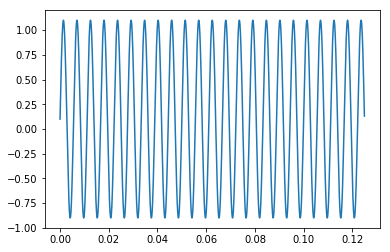

In [217]:
plt.plot(x[:N], yt[:N])

In [218]:
sp = np.fft.fft(yt[:N])
sp

array([467.54091288+0.j        ,  58.05559069+0.00556691j,
        58.4023639 +0.01120032j, ...,  58.98961709-0.01696939j,
        58.4023639 -0.01120032j,  58.05559069-0.00556691j])

In [219]:
bins_to_shift = 100

In [220]:
mag = np.absolute(sp)
phase = np.angle(sp)

mag_new_wrong = np.zeros(N)
mag_new_wrong[0:(N//2)] = np.roll(mag[0:(N//2)], bins_to_shift)
mag_new_wrong[(N//2):] = np.roll(mag[(N//2):0:-1], -bins_to_shift)

mag_new = np.zeros(N)
mag_new[0] = mag[0]
mag_new[1:(N//2) + 1] = np.roll(mag[1:(N//2) + 1], bins_to_shift)
mag_new[(N//2)+1:] = np.roll(mag[(N//2)-1:0:-1], -bins_to_shift)

phase_new_wrong = np.zeros(N)
phase_new_wrong[0:N//2] = np.roll(phase[0:N//2], bins_to_shift)
phase_new_wrong[(N//2):] = np.roll(-phase[(N//2):0:-1], -bins_to_shift)

phase_new = np.zeros(N)
phase_new[0] = phase[0]
phase_new[1:N//2 + 1] = np.roll(phase[1:(N//2) + 1], bins_to_shift)
phase_new[(N//2) + 1:] = np.roll(-phase[(N//2)-1:0:-1], -bins_to_shift)

sp_new_wrong = mag_new_wrong * np.exp(1j*phase_new_wrong)
sp_new = mag_new * np.exp(1j*phase_new)
sp_new

array([ 4.67540913e+02+0.j        , -1.52021502e-02-0.00016417j,
       -1.52001340e-02-0.0001625j , ..., -1.52001340e-02+0.0001625j ,
       -1.52021502e-02+0.00016417j, -1.52041870e-02+0.00016583j])

In [221]:
phase

array([ 0.00000000e+00,  9.58893858e-05,  1.91778586e-04, ...,
       -2.87667417e-04, -1.91778586e-04, -9.58893858e-05])

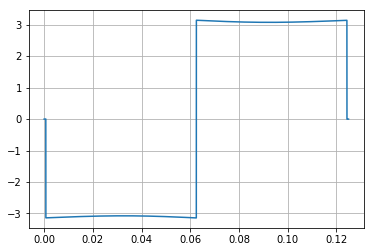

In [222]:
plt.plot(x[:N], phase)
plt.grid()

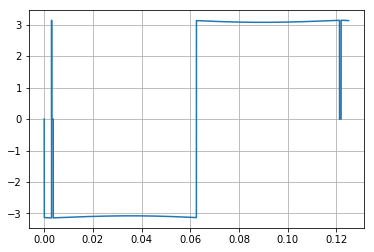

In [223]:
plt.plot(x[:N], phase_new)
plt.grid()

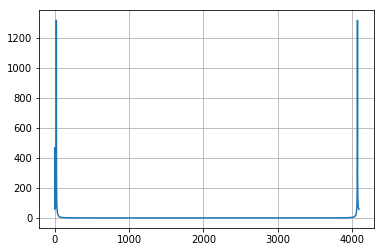

In [224]:
plt.plot(range(0, 4096), mag)
plt.grid()

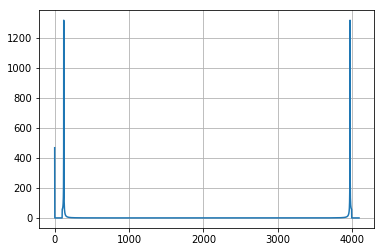

In [225]:
plt.plot(range(0, 4096), mag_new)
plt.grid()

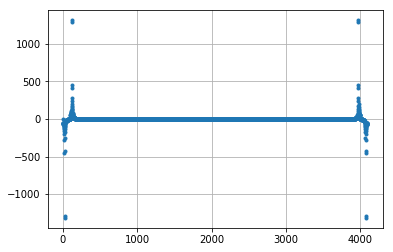

In [226]:
plt.plot(range(0, 4096), mag_new - mag, '.')
plt.grid()

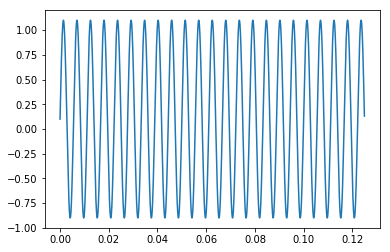

In [227]:
plt.plot(x[:N], np.fft.ifft(sp))

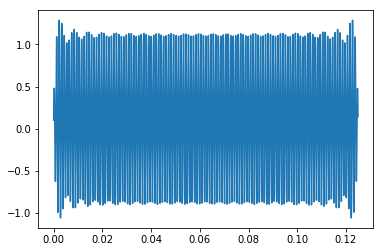

In [228]:
plt.plot(x[:N], np.fft.ifft(sp_new))

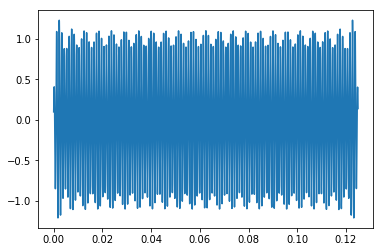

In [229]:
plt.plot(x[:N], np.fft.ifft(sp_new_wrong))

In [50]:
import struct

In [51]:
with open("bram_sine_init.coe", "w") as f:
    f.write(f"memory_initialization_radix=16;\n")
    f.write(f"memory_initialization_vector=\n")
    for val in yt[:N]:
        val = int(val * (10**4))
        res = struct.pack("<h", val)
        print(val)
        print(f"{hex(res[1])[2:].zfill(2)}{hex(res[0])[2:].zfill(2)}")
        f.write(f"{hex(res[1])[2:].zfill(2)}{hex(res[0])[2:].zfill(2)}\n")

0
0000
345
0159
689
02b1
1033
0409
1376
0560
1717
06b5
2056
0808
2392
0958
2726
0aa6
3056
0bf0
3383
0d37
3706
0e7a
4024
0fb8
4337
10f1
4646
1226
4949
1355
5246
147e
5536
15a0
5820
16bc
6097
17d1
6367
18df
6630
19e6
6884
1ae4
7130
1bda
7368
1cc8
7597
1dad
7817
1e89
8027
1f5b
8228
2024
8419
20e3
8601
2199
8771
2243
8932
22e4
9082
237a
9221
2405
9349
2485
9466
24fa
9571
2563
9665
25c1
9748
2614
9819
265b
9879
2697
9926
26c6
9962
26ea
9986
2702
9998
270e
9998
270e
9986
2702
9963
26eb
9927
26c7
9880
2698
9820
265c
9750
2616
9667
25c3
9573
2565
9468
24fc
9351
2487
9223
2407
9085
237d
8935
22e7
8775
2247
8604
219c
8423
20e7
8232
2028
8031
1f5f
7821
1e8d
7601
1db1
7372
1ccc
7135
1bdf
6889
1ae9
6635
19eb
6372
18e4
6103
17d7
5826
16c2
5542
15a6
5251
1483
4954
135a
4652
122c
4344
10f8
4030
0fbe
3712
0e80
3389
0d3d
3063
0bf7
2732
0aac
2399
095f
2062
080e
1723
06bb
1382
0566
1040
0410
696
02b8
351
015f
6
0006
-338
feae
-683
fd55
-1026
fbfe
-1369
faa7
-1710
f952
-2049
f7ff
-2386
f6ae
-2719
f561
-305

2216
8889
22b9
9042
2352
9184
23e0
9315
2463
9435
24db
9544
2548
9641
25a9
9727
25ff
9801
2649
9864
2688
9914
26ba
9953
26e1
9981
26fd
9996
270c
9999
270f
9991
2707
9970
26f2
9938
26d2
9894
26a6
9838
266e
9770
262a
9691
25db
9600
2580
9498
251a
9384
24a8
9259
242b
9123
23a3
8977
2311
8819
2273
8651
21cb
8473
2119
8285
205d
8087
1f97
7879
1ec7
7662
1dee
7436
1d0c
7200
1c20
6957
1b2d
6705
1a31
6445
192d
6177
1821
5902
170e
5620
15f4
5331
14d3
5036
13ac
4735
127f
4428
114c
4116
1014
3799
0ed7
3477
0d95
3152
0c50
2823
0b07
2490
09ba
2154
086a
1816
0718
1475
05c3
1133
046d
790
0316
445
01bd
100
0064
-244
ff0c
-589
fdb3
-933
fc5b
-1276
fb04
-1617
f9af
-1957
f85b
-2294
f70a
-2629
f5bb
-2960
f470
-3288
f328
-3612
f1e4
-3932
f0a4
-4247
ef69
-4556
ee34
-4861
ed03
-5160
ebd8
-5452
eab4
-5738
e996
-6017
e87f
-6289
e76f
-6554
e666
-6811
e565
-7059
e46d
-7299
e37d
-7531
e295
-7753
e1b7
-7967
e0e1
-8171
e015
-8365
df53
-8549
de9b
-8723
dded
-8886
dd4a
-9039
dcb1
-9181
dc23
-9313
db9f
-9433
db27
-9542

fdec
-187
ff45
157
009d
502
01f6
846
034e
1189
04a5
1531
05fb
1871
074f
2209
08a1
2545
09f1
2877
0b3d
3206
0c86
3530
0dca
3851
0f0b
4167
1047
4479
117f
4784
12b0
5085
13dd
5379
1503
5666
1622
5947
173b
6221
184d
6488
1958
6746
1a5a
6997
1b55
7239
1c47
7473
1d31
7698
1e12
7914
1eea
8120
1fb8
8316
207c
8503
2137
8680
21e8
8846
228e
9001
2329
9146
23ba
9280
2440
9403
24bb
9515
252b
9616
2590
9705
25e9
9782
2636
9848
2678
9902
26ae
9944
26d8
9974
26f6
9993
2709
9999
270f
9994
270a
9977
26f9
9948
26dc
9907
26b3
9854
267e
9790
263e
9713
25f1
9626
259a
9527
2537
9416
24c8
9294
244e
9161
23c9
9018
233a
8863
229f
8698
21fa
8523
214b
8337
2091
8142
1fce
7937
1f01
7722
1e2a
7498
1d4a
7265
1c61
7024
1b70
6774
1a76
6516
1974
6251
186b
5977
1759
5697
1641
5410
1522
5117
13fd
4817
12d1
4512
11a0
4201
1069
3886
0f2e
3565
0ded
3241
0ca9
2913
0b61
2581
0a15
2246
08c6
1908
0774
1568
0620
1226
04ca
883
0373
539
021b
194
00c2
-150
ff6a
-495
fe11
-839
fcb9
-1183
fb61
-1525
fa0b
-1865
f8b7
-2203
f765
-2538
f

0ae3
3116
0c2c
3442
0d72
3764
0eb4
4082
0ff2
4394
112a
4702
125e
5004
138c
5299
14b3
5589
15d5
5872
16f0
6147
1803
6416
1910
6677
1a15
6930
1b12
7174
1c06
7410
1cf2
7638
1dd6
7856
1eb0
8065
1f81
8264
2048
8453
2105
8633
21b9
8802
2262
8960
2300
9108
2394
9245
241d
9371
249b
9486
250e
9589
2575
9681
25d1
9762
2622
9831
2667
9888
26a0
9934
26ce
9967
26ef
9989
2705
9999
270f
9997
270d
9983
26ff
9957
26e5
9919
26bf
9870
268e
9808
2650
9735
2607
9651
25b3
9555
2553
9447
24e7
9329
2471
9199
23ef
9058
2362
8906
22ca
8744
2228
8572
217c
8389
20c5
8196
2004
7993
1f39
7781
1e65
7560
1d88
7329
1ca1
7090
1bb2
6843
1abb
6587
19bb
6324
18b4
6052
17a4
5774
168e
5489
1571
5197
144d
4899
1323
4596
11f4
4286
10be
3972
0f84
3653
0e45
3330
0d02
3002
0bba
2671
0a6f
2337
0921
2000
07d0
1661
067d
1320
0528
977
03d1
633
0279
288
0120
-56
ffc8
-401
fe6f
-746
fd16
-1089
fbbf
-1432
fa68
-1772
f914
-2111
f7c1
-2447
f671
-2780
f524
-3110
f3da
-3436
f294
-3758
f152
-4076
f014
-4388
eedc
-4696
eda8
-4998
ec7a
-5294


In [52]:
N = 20

In [53]:
zerostest = np.zeros(N)
source = np.linspace(1, N, N)
zerostest[0] = source[0]
zerostest[1:(N//2) + 1] = source[1:(N//2) + 1]
zerostest[(N//2) + 1:] = source[(N//2)-1:0:-1]
zerostest

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 10.,  9.,
        8.,  7.,  6.,  5.,  4.,  3.,  2.])

In [54]:
source

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])